In [1]:
import pandas as pd
import json
import numpy as np


## Prepare

In [28]:
checkin_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_checkin.json"
business_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_business.json"
review_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_review.json"
tip_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_tip.json"
user_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_user.json"


In [29]:
'''
with open(checkin_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

checkin = pd.DataFrame(data)'''
with open(business_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

business = pd.DataFrame(data)
with open(review_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

review = pd.DataFrame(data)
'''
with open(tip_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

tip = pd.DataFrame(data)
with open(user_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

user = pd.DataFrame(data)
'''

'\nwith open(tip_path, "r", encoding="utf-8") as f:\n    data = [json.loads(line) for line in f]\n\ntip = pd.DataFrame(data)\nwith open(user_path, "r", encoding="utf-8") as f:\n    data = [json.loads(line) for line in f]\n\nuser = pd.DataFrame(data)\n'

In [30]:
business_filtered = business[business["city"] == "Sparks"]
business_ids = business_filtered["business_id"]

filtered_reviews = review[review["business_id"].isin(business_ids)]


In [31]:
filtered_reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
121,jazQvYxoflZm6BBjmh1gZg,_e2wv_nRna0sZrk-Wqd48Q,YNm4WrEHejsVIEfkZ0MZFQ,5.0,0,0,0,I had numerous things happen during my move an...,2010-11-22 15:05:20
281,eBrVkzHhHKZxyVS1SPKbJw,1PJ-RjMqXHeymSkLRzuIdA,nOyphAl0JQ8JrvNi93pclQ,2.0,3,1,1,So I no longer go here which is a shame becaus...,2014-10-28 13:58:00
284,rAPjnkSsC1ryIPILxMWAfw,QaUCU7y3lk0UEpa1I_x8-A,VCbUVUzENG46pFUOg4g3iw,5.0,2,0,0,Thanks yelp reviewers...you didn't let me down...,2015-07-03 19:36:25
421,LkXdUnLG55HUqClm5C-FRQ,Bcwv94u7FgNCpCoJLmSsaA,l4aS1QVy_bGnwUXSJzpbsw,5.0,0,0,1,Best pizza ever... hands down.\n\nLove the pee...,2009-08-04 22:21:20
463,EMkIwb1whDSGlvEWsnId3w,CePuKN0wwl5CW-58rkt3-w,1ScZ3h0kIT_DGCVlP-aDSA,5.0,0,0,0,I love these guys. Tony is one of big help. Ha...,2018-02-01 19:49:27
...,...,...,...,...,...,...,...,...,...
6989803,oDpz2nfU1J1nzaDcYtEGSw,kkaWSsIDLsKzHOl1UpD2tg,nTEmSvz8_DK-iK3miQFCwA,3.0,2,0,1,We were going to a different restaurant this m...,2017-02-18 21:27:15
6989813,WkeqciXlln3NQ3E9Va8kOA,J0-Fbsi-hXlejjpNN-h5KA,lna-UaP3ZH0EjFgYNSOQZw,1.0,5,0,1,I have been here several months. Clean and qui...,2018-10-31 23:54:33
6989871,La8GFrkoNP72qHjXdwqeKA,2h7J39cjxmlwR0DCUKQ_2Q,nTEmSvz8_DK-iK3miQFCwA,5.0,0,0,0,Fantastic service! Super crowded for a mining ...,2021-12-09 05:40:02
6989951,7CKwzyiT-w4UElngBiPYEQ,OgEJUb4R_5qeeu6wiYOh_A,51YfncbIi2gVOJEJUd_8qg,1.0,1,0,0,It pains me to write this review as this has b...,2011-02-14 04:49:44


In [32]:
review_short= filtered_reviews.drop(columns=["review_id","business_id","date"])
review_short

,user_id,stars,useful,funny,cool,text
121,_e2wv_nRna0sZrk-Wqd48Q,5.0,0,0,0,I had numerous things happen during my move an...
281,1PJ-RjMqXHeymSkLRzuIdA,2.0,3,1,1,So I no longer go here which is a shame becaus...
284,QaUCU7y3lk0UEpa1I_x8-A,5.0,2,0,0,Thanks yelp reviewers...you didn't let me down...
421,Bcwv94u7FgNCpCoJLmSsaA,5.0,0,0,1,Best pizza ever... hands down.\n\nLove the pee...
463,CePuKN0wwl5CW-58rkt3-w,5.0,0,0,0,I love these guys. Tony is one of big help. Ha...
...,...,...,...,...,...,...
6989803,kkaWSsIDLsKzHOl1UpD2tg,3.0,2,0,1,We were going to a different restaurant this m...
6989813,J0-Fbsi-hXlejjpNN-h5KA,1.0,5,0,1,I have been here several months. Clean and qui...
6989871,2h7J39cjxmlwR0DCUKQ_2Q,5.0,0,0,0,Fantastic service! Super crowded for a mining ...
6989951,OgEJUb4R_5qeeu6wiYOh_A,1.0,1,0,0,It pains me to write this review as this has b...


### Lowecasing

In [33]:
review_lower=review_short
review_lower["text"]=review_lower["text"].str.lower()
review_lower

,user_id,stars,useful,funny,cool,text
121,_e2wv_nRna0sZrk-Wqd48Q,5.0,0,0,0,i had numerous things happen during my move an...
281,1PJ-RjMqXHeymSkLRzuIdA,2.0,3,1,1,so i no longer go here which is a shame becaus...
284,QaUCU7y3lk0UEpa1I_x8-A,5.0,2,0,0,thanks yelp reviewers...you didn't let me down...
421,Bcwv94u7FgNCpCoJLmSsaA,5.0,0,0,1,best pizza ever... hands down.\n\nlove the pee...
463,CePuKN0wwl5CW-58rkt3-w,5.0,0,0,0,i love these guys. tony is one of big help. ha...
...,...,...,...,...,...,...
6989803,kkaWSsIDLsKzHOl1UpD2tg,3.0,2,0,1,we were going to a different restaurant this m...
6989813,J0-Fbsi-hXlejjpNN-h5KA,1.0,5,0,1,i have been here several months. clean and qui...
6989871,2h7J39cjxmlwR0DCUKQ_2Q,5.0,0,0,0,fantastic service! super crowded for a mining ...
6989951,OgEJUb4R_5qeeu6wiYOh_A,1.0,1,0,0,it pains me to write this review as this has b...


In [34]:
corpus=review_lower.drop(columns=["useful","funny","cool"])

### First Cleaning


In [ ]:
import string

corpus["text"] = corpus["text"].apply(lambda text: text.replace("\n", "").replace("...", ""))
corpus["text"] = corpus["text"].apply(lambda text: ''.join([char for char in text if char not in string.punctuation]))


### Lemmatization

In [36]:
import spacy

nlp = spacy.load("en_core_web_sm")


In [37]:
corpus

,user_id,stars,text
121,_e2wv_nRna0sZrk-Wqd48Q,5.0,i had numerous things happen during my move an...
281,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...
284,QaUCU7y3lk0UEpa1I_x8-A,5.0,thanks yelp reviewersyou didnt let me down an...
421,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...
463,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...
...,...,...,...
6989803,kkaWSsIDLsKzHOl1UpD2tg,3.0,we were going to a different restaurant this m...
6989813,J0-Fbsi-hXlejjpNN-h5KA,1.0,i have been here several months clean and quie...
6989871,2h7J39cjxmlwR0DCUKQ_2Q,5.0,fantastic service super crowded for a mining c...
6989951,OgEJUb4R_5qeeu6wiYOh_A,1.0,it pains me to write this review as this has b...


In [38]:
corpus['words'] = None
for index, sample in corpus.iterrows():
    list_words = [] 
    sent = nlp(sample.text)
    
    for token in sent:
        list_words.append(token.lemma_)
    
    corpus.at[index, "words"] = list_words 


In [39]:
corpus.to_csv('lemma.csv', index=False, encoding='utf-8')

## READ

In [2]:
corpus = pd.read_csv('lemma.csv', encoding='utf-8')

In [3]:
corpus

,user_id,stars,text,words
0,_e2wv_nRna0sZrk-Wqd48Q,5.0,i had numerous things happen during my move an...,"['I', 'have', 'numerous', 'thing', 'happen', '..."
1,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"['so', 'I', 'no', 'long', 'go', 'here', 'which..."
2,QaUCU7y3lk0UEpa1I_x8-A,5.0,thanks yelp reviewersyou didnt let me down an...,"['thank', 'yelp', 'reviewersyou', 'do', 'not',..."
3,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"['good', 'pizza', 'ever', 'hand', 'downlove', ..."
4,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"['I', 'love', 'these', 'guy', 'tony', 'be', 'o..."
...,...,...,...,...
73028,kkaWSsIDLsKzHOl1UpD2tg,3.0,we were going to a different restaurant this m...,"['we', 'be', 'go', 'to', 'a', 'different', 're..."
73029,J0-Fbsi-hXlejjpNN-h5KA,1.0,i have been here several months clean and quie...,"['I', 'have', 'be', 'here', 'several', 'month'..."
73030,2h7J39cjxmlwR0DCUKQ_2Q,5.0,fantastic service super crowded for a mining c...,"['fantastic', 'service', 'super', 'crowd', 'fo..."
73031,OgEJUb4R_5qeeu6wiYOh_A,1.0,it pains me to write this review as this has b...,"['it', 'pain', 'I', 'to', 'write', 'this', 're..."


### Remove Stopwords

In [4]:
print(corpus["words"].apply(type).unique())


[<class 'str'>]


In [5]:
import nltk
import ast  # Para convertir strings en listas
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

# Convertir strings en listas
corpus["words"] = corpus["words"].apply(ast.literal_eval)

stop_words = set(stopwords.words('english'))

corpus["words"] = corpus["words"].apply(lambda x: [word for word in x if word.lower() not in stop_words and not word.isdigit()])

# Limpiar directamente la columna 'words' eliminando signos de puntuación y saltos de línea



[nltk_data] Downloading package stopwords to /home/jaume/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
corpus

,user_id,stars,text,words
0,_e2wv_nRna0sZrk-Wqd48Q,5.0,i had numerous things happen during my move an...,"[numerous, thing, happen, move, require, addit..."
1,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"[long, go, shame, eyebrow, wax, fantastic, giv..."
2,QaUCU7y3lk0UEpa1I_x8-A,5.0,thanks yelp reviewersyou didnt let me down an...,"[thank, yelp, reviewersyou, let, , neither, t..."
3,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"[good, pizza, ever, hand, downlove, peep, run,..."
4,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"[love, guy, tony, one, big, help, flat, tire, ..."
...,...,...,...,...
73028,kkaWSsIDLsKzHOl1UpD2tg,3.0,we were going to a different restaurant this m...,"[go, different, restaurant, morning, find, arr..."
73029,J0-Fbsi-hXlejjpNN-h5KA,1.0,i have been here several months clean and quie...,"[several, month, clean, quiet, bad, management..."
73030,2h7J39cjxmlwR0DCUKQ_2Q,5.0,fantastic service super crowded for a mining c...,"[fantastic, service, super, crowd, mining, con..."
73031,OgEJUb4R_5qeeu6wiYOh_A,1.0,it pains me to write this review as this has b...,"[pain, write, review, favorite, sushi, place, ..."


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus["text"])

print(X.shape)

(73033, 101325)


In [8]:
X

<73033x101325 sparse matrix of type '<class 'numpy.int64'>'
	with 5026379 stored elements in Compressed Sparse Row format>

### VADER POLARITY

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
y_pred = []
for rev in corpus["text"]:
    y_pred.append(1 if analyzer.polarity_scores(rev)['compound'] > 0 else 0)

In [11]:
corpus["vader"]= y_pred
corpus["text"][corpus["vader"]==0]

1        so i no longer go here which is a shame becaus...
21       horrible old cigarette smelly even tho we requ...
23       i dropped off a suit that i needed cleaned las...
26       i ordered the chicken enchiladas and was rathe...
32       first time turkey meal buyer absolutely disgus...
                               ...                        
73012    walked in and the horrible fish bad oil smell ...
73015    im not a person to leave a bad review but i wi...
73016    went a few times to deal with my asthma and al...
73017    if we could give it no stars at all we would w...
73029    i have been here several months clean and quie...
Name: text, Length: 14490, dtype: object

In [12]:
corpus["text"].to_numpy()

array(['i had numerous things happen during my move and required additional services from this office the guys in this office are top notch and are very trustworthy id say more about how they took great care of me but they may have gone above and beyond what they should have and afraid to say too much i would recommend this office to my mother',
       'so i no longer go here which is a shame because the eyebrow waxing here is fantastic i am giving this 2 stars because when i have contacted for an appointment via the phone it usually has taken days for me to get a response the online booking is useless because i rarely have found appointments within 2 weeks of when i need it and im very flexible with time of day i give up on this place unless you book out weeks in advance you will not get an appointment im now paying 10 more elsewhere which sucks but im able to get seen when i need to be seen',
       'thanks yelp reviewersyou didnt let me down  and neither did todd and roberta  they j

## Cleaning


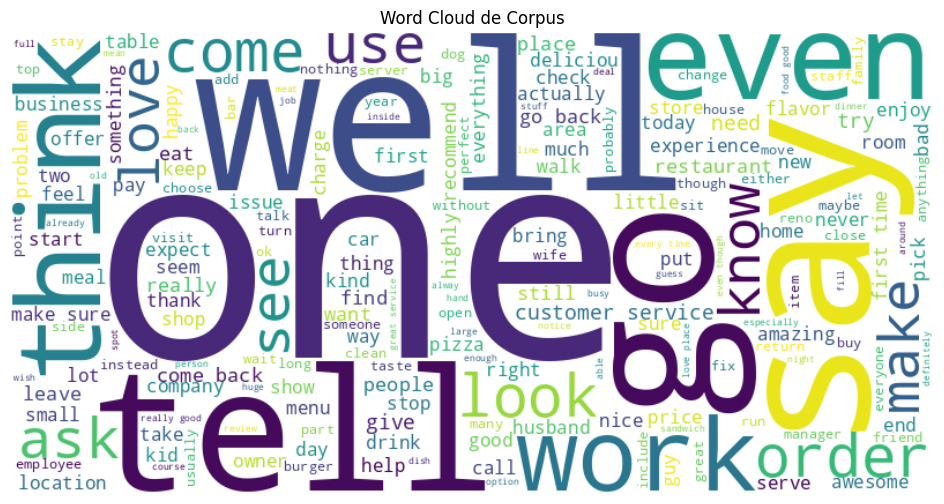

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1️⃣ Aplanar la lista de listas y unir palabras en un solo string
flat_words = [word for sublist in corpus["words"] for word in sublist]
text = " ".join(flat_words)

# 2️⃣ Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# 3️⃣ Graficar el WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Ocultar ejes
plt.title("Word Cloud de Corpus")
plt.show()


In [14]:
irrelevant_words=["well","tell","one","say","think","come","look","even","make","really","ask","use","see","want","go"]


In [15]:
# remove empty words and irrelevant words
corpus["words"] = [[word for word in sublist if word not in irrelevant_words] for sublist in corpus["words"]]
corpus["words"] = corpus["words"].apply(lambda x: [word for word in x if word.strip()])

In [16]:
corpus['words_join'] = None
corpus["words_join"] = corpus["words"].apply(lambda x: " ".join([word for word in x if word]))

In [17]:
corpus

,user_id,stars,text,words,vader,words_join
0,_e2wv_nRna0sZrk-Wqd48Q,5.0,i had numerous things happen during my move an...,"[numerous, thing, happen, move, require, addit...",1,numerous thing happen move require additional ...
1,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"[long, shame, eyebrow, wax, fantastic, give, s...",0,long shame eyebrow wax fantastic give star con...
2,QaUCU7y3lk0UEpa1I_x8-A,5.0,thanks yelp reviewersyou didnt let me down an...,"[thank, yelp, reviewersyou, let, neither, todd...",1,thank yelp reviewersyou let neither todd rober...
3,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"[good, pizza, ever, hand, downlove, peep, run,...",1,good pizza ever hand downlove peep run place f...
4,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"[love, guy, tony, big, help, flat, tire, get, ...",1,love guy tony big help flat tire get fix less ...
...,...,...,...,...,...,...
73028,kkaWSsIDLsKzHOl1UpD2tg,3.0,we were going to a different restaurant this m...,"[different, restaurant, morning, find, arrive,...",1,different restaurant morning find arrive could...
73029,J0-Fbsi-hXlejjpNN-h5KA,1.0,i have been here several months clean and quie...,"[several, month, clean, quiet, bad, management...",0,several month clean quiet bad managementi get ...
73030,2h7J39cjxmlwR0DCUKQ_2Q,5.0,fantastic service super crowded for a mining c...,"[fantastic, service, super, crowd, mining, con...",1,fantastic service super crowd mining conferenc...
73031,OgEJUb4R_5qeeu6wiYOh_A,1.0,it pains me to write this review as this has b...,"[pain, write, review, favorite, sushi, place, ...",1,pain write review favorite sushi place tonight...


## Remove foreign reviews

In [18]:
import pandas as pd
import nltk
from nltk.corpus import words

# Dowload english
nltk.download("words")
english_vocab = set(words.words())

# Función para contar palabras que no están en inglés
def count_non_english_words(word_list):
    return sum(1 for word in word_list if word.lower() not in english_vocab)

# Filtrar corpus
corpus["non_english_count"] = corpus["words"].apply(count_non_english_words)


pd.set_option('display.max_colwidth', None)  # Show full text without truncation
corpus


[nltk_data] Downloading package words to /home/jaume/nltk_data...
[nltk_data]   Package words is already up-to-date!


,user_id,stars,text,words,vader,words_join,non_english_count
0,_e2wv_nRna0sZrk-Wqd48Q,5.0,i had numerous things happen during my move and required additional services from this office the guys in this office are top notch and are very trustworthy id say more about how they took great care of me but they may have gone above and beyond what they should have and afraid to say too much i would recommend this office to my mother,"[numerous, thing, happen, move, require, additional, service, office, guy, office, top, notch, trustworthy, take, great, care, may, beyond, afraid, much, would, recommend, office, mother]",1,numerous thing happen move require additional service office guy office top notch trustworthy take great care may beyond afraid much would recommend office mother,0
1,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame because the eyebrow waxing here is fantastic i am giving this 2 stars because when i have contacted for an appointment via the phone it usually has taken days for me to get a response the online booking is useless because i rarely have found appointments within 2 weeks of when i need it and im very flexible with time of day i give up on this place unless you book out weeks in advance you will not get an appointment im now paying 10 more elsewhere which sucks but im able to get seen when i need to be seen,"[long, shame, eyebrow, wax, fantastic, give, star, contact, appointment, via, phone, usually, take, day, get, response, online, booking, useless, rarely, find, appointment, within, week, need, flexible, time, day, give, place, unless, book, week, advance, get, appointment, pay, elsewhere, suck, able, get, need]",0,long shame eyebrow wax fantastic give star contact appointment via phone usually take day get response online booking useless rarely find appointment within week need flexible time day give place unless book week advance get appointment pay elsewhere suck able get need,1
2,QaUCU7y3lk0UEpa1I_x8-A,5.0,thanks yelp reviewersyou didnt let me down and neither did todd and roberta they just left my house and i am in awe of what an amazing job they did carpet and couch looks greatspots where my dog a some accidents the other day are all gone everything just smells freshno chemicals to inhale and nothing has that wet smell and i cant believe how dry it all is so soon after plus they are thenicest people with tons of knowledge and tips on how to care for your home worth every penny and not only recommending them but definitely will be using them in the future,"[thank, yelp, reviewersyou, let, neither, todd, roberta, leave, house, awe, amazing, job, carpet, couch, greatspot, dog, accident, day, everything, smell, freshno, chemical, inhale, nothing, wet, smell, believe, dry, soon, plus, thenicest, people, ton, knowledge, tip, care, home, worth, every, penny, recommend, definitely, future]",1,thank yelp reviewersyou let neither todd roberta leave house awe amazing job carpet couch greatspot dog accident day everything smell freshno chemical inhale nothing wet smell believe dry soon plus thenicest people ton knowledge tip care home worth every penny recommend definitely future,6
3,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps running the place former hockey player ask him to pop his nose and adorable but tough as nails wife very funnythey make their own sausage and mozzarella here and god help you if you mispronounce ricottaany of the pizzas are fab we even eat the crusts which is a rarity in our family just dab it in the olive oil and mayb ask for some of their viniagrette to dip too,"[good, pizza, ever, hand, downlove, peep, run, place, former, hockey, player, pop, nose, adorable, tough, nail, wife, funnythey, sausage, mozzarella, god, help, mispronounce, ricottaany, pizza, fab, eat, crust, rarity, family, dab, olive, oil, mayb, viniagrette, dip]",1,good pizza ever hand downlove peep run place former hockey player pop nose adorable tough nail wife funnythey sausage moz

In [19]:
pd.reset_option('display.max_colwidth')

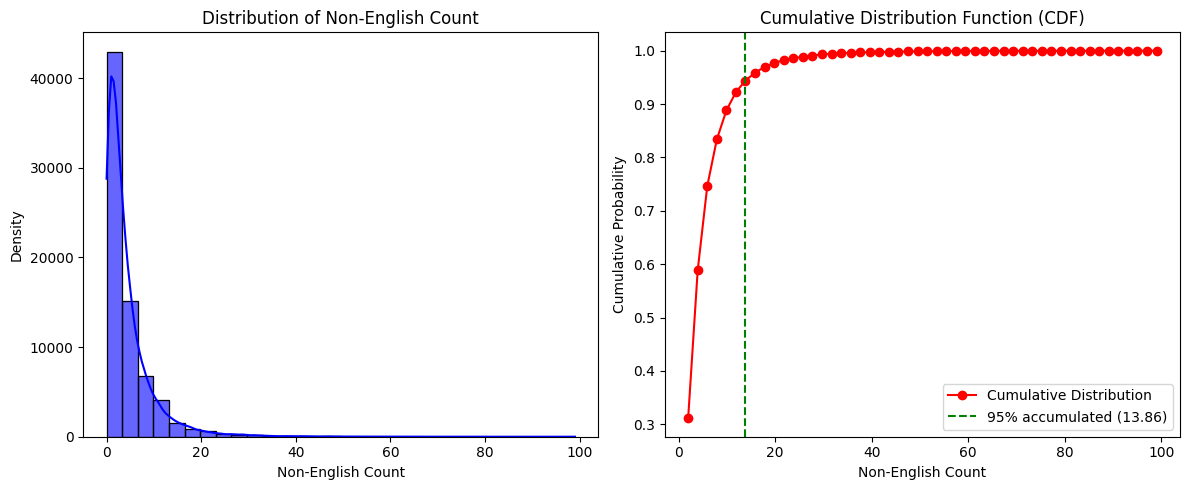

The value where 95% of the data accumulates is approximately 13.86


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter values up to 50
filtered_values = corpus["non_english_count"][corpus["non_english_count"] <= 100]

# Compute histogram and cumulative distribution
counts, bin_edges = np.histogram(filtered_values, bins=50, density=True)
cdf = np.cumsum(counts) / np.sum(counts)  # Normalize

# Find the threshold where 95% of the data accumulates
threshold_index = np.argmax(cdf >= 0.95)
threshold_value = bin_edges[threshold_index]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Histogram (distribution)
sns.histplot(filtered_values, bins=30, kde=True, ax=axes[0], color="blue", alpha=0.6)
axes[0].set_xlabel("Non-English Count")
axes[0].set_ylabel("Density")
axes[0].set_title("Distribution of Non-English Count")

# Right plot: Cumulative Distribution Function (CDF)
axes[1].plot(bin_edges[1:], cdf, color="red", marker="o", linestyle="-", label="Cumulative Distribution")
axes[1].axvline(threshold_value, color="green", linestyle="--", label=f"95% accumulated ({threshold_value:.2f})")
axes[1].set_xlabel("Non-English Count")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].legend()

plt.tight_layout()
plt.show()

# Print the threshold value
print(f"The value where 95% of the data accumulates is approximately {threshold_value:.2f}")


In [21]:
corpus = corpus[corpus["non_english_count"] <= threshold_value ].drop(columns=["non_english_count"])

## LDA

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
num_batches = 7
n_topics = 9
batches = np.array_split(corpus, num_batches)


/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [23]:
from collections import Counter

# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


In [24]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        print(temp_vector_sum)
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
        
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)  # Simply store the word as-is
        top_words.append(" ".join(topic_words))         
    return top_words


Procesando Batch 1/7...


/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



Procesando Batch 2/7...

Procesando Batch 3/7...

Procesando Batch 4/7...

Procesando Batch 5/7...

Procesando Batch 6/7...

Procesando Batch 7/7...


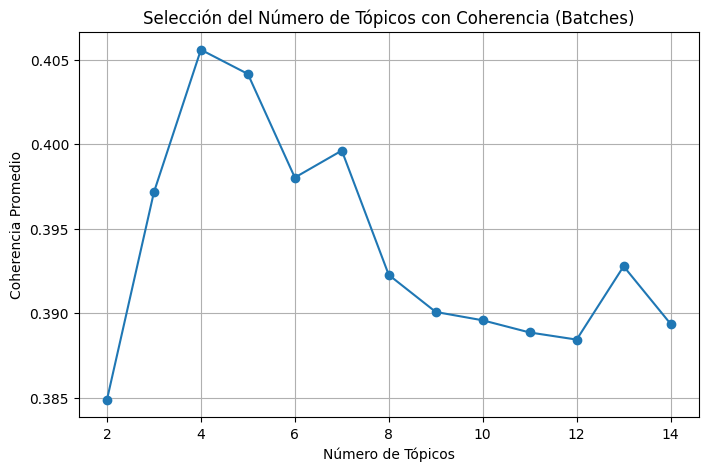

In [25]:

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
# Suponiendo que tienes un DataFrame con una columna "words"
df_corpus = corpus


# Dividir en batches correctamente
num_batches = 7
df_batches = np.array_split(df_corpus, num_batches)  # Dividir el DataFrame en partes

# Rango de número de tópicos a probar
topic_range = range(2, 15)
coherence_values = np.zeros(len(topic_range))  # Acumular coherencia

# Procesar cada batch
for batch_idx, batch_df in enumerate(df_batches):
    print(f"\nProcesando Batch {batch_idx+1}/{num_batches}...")

    # Convertir la columna "words" a lista de listas
    batch_texts = batch_df["words"].tolist()

    # Crear diccionario y corpus para este batch
    dictionary = corpora.Dictionary(batch_texts)
    corpus2 = [dictionary.doc2bow(text) for text in batch_texts]

    # Calcular coherencia para cada número de tópicos
    for i, num_topics in enumerate(topic_range):
        lda_model = gensim.models.LdaModel(corpus=corpus2, id2word=dictionary, num_topics=num_topics, random_state=42)
        coherence_model = CoherenceModel(model=lda_model, texts=batch_texts, dictionary=dictionary, coherence='c_v')
        coherence_values[i] += coherence_model.get_coherence()  # Sumar coherencia del batch

# Promediar los valores de coherencia
coherence_values /= num_batches  

# Graficar coherencia vs. número de tópicos
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.xlabel("Número de Tópicos")
plt.ylabel("Coherencia Promedio")
plt.title("Selección del Número de Tópicos con Coherencia (Batches)")
plt.grid()
plt.show()

In [26]:
corpus

,user_id,stars,text,words,vader,words_join
0,_e2wv_nRna0sZrk-Wqd48Q,5.0,i had numerous things happen during my move an...,"[numerous, thing, happen, move, require, addit...",1,numerous thing happen move require additional ...
1,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"[long, shame, eyebrow, wax, fantastic, give, s...",0,long shame eyebrow wax fantastic give star con...
2,QaUCU7y3lk0UEpa1I_x8-A,5.0,thanks yelp reviewersyou didnt let me down an...,"[thank, yelp, reviewersyou, let, neither, todd...",1,thank yelp reviewersyou let neither todd rober...
3,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"[good, pizza, ever, hand, downlove, peep, run,...",1,good pizza ever hand downlove peep run place f...
4,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"[love, guy, tony, big, help, flat, tire, get, ...",1,love guy tony big help flat tire get fix less ...
...,...,...,...,...,...,...
73028,kkaWSsIDLsKzHOl1UpD2tg,3.0,we were going to a different restaurant this m...,"[different, restaurant, morning, find, arrive,...",1,different restaurant morning find arrive could...
73029,J0-Fbsi-hXlejjpNN-h5KA,1.0,i have been here several months clean and quie...,"[several, month, clean, quiet, bad, management...",0,several month clean quiet bad managementi get ...
73030,2h7J39cjxmlwR0DCUKQ_2Q,5.0,fantastic service super crowded for a mining c...,"[fantastic, service, super, crowd, mining, con...",1,fantastic service super crowd mining conferenc...
73031,OgEJUb4R_5qeeu6wiYOh_A,1.0,it pains me to write this review as this has b...,"[pain, write, review, favorite, sushi, place, ...",1,pain write review favorite sushi place tonight...


In [34]:

n_topics = np.argmax(coherence_values)+2
batches = np.array_split(corpus, num_batches)


In [ ]:
#n_topics=5

In [52]:
batches[1]

,user_id,stars,text,words,vader,words_join
10467,PHJMjMJnXL67e0NfKUg9GA,5.0,we saw their ad in an rv brochure in sparks nv...,"[ad, rv, brochure, spark, nv, meet, owner, mon...",1,ad rv brochure spark nv meet owner month later...
10468,5mblslDPEppF7jqf54SwUA,5.0,great pricing they literally underbid many oth...,"[great, pricing, literally, underbid, many, pl...",1,great pricing literally underbid many place ma...
10469,EnzPICzjo1a0Oxw9v0IdJQ,5.0,went to eat pizza today it was nice to be able...,"[eat, pizza, today, nice, able, sit, good, par...",1,eat pizza today nice able sit good part though...
10470,JH0VY8IonBNxpHIX-Yh9lA,5.0,ive had to use paschall plumbing for a few pro...,"[paschall, plumbing, problem, last, couple, mo...",0,paschall plumbing problem last couple month lu...
10471,imhakugJPTnW5zfry8fv6Q,4.0,a surprisingly good korean place in sparks we ...,"[surprisingly, good, korean, place, spark, sea...",1,surprisingly good korean place spark seafood p...
...,...,...,...,...,...,...
20830,pysDR_22tXE1nx58aZ9gRw,2.0,just called to get pricing on mounting new rim...,"[call, get, pricing, mount, new, rim, tire, ru...",0,call get pricing mount new rim tire rude ill p...
20831,0Nb5scGRavoWVKUVpHs7-g,5.0,i love coming to sinbads with my family kristi...,"[love, sinbad, family, kristine, always, frien...",1,love sinbad family kristine always friendly sw...
20832,yIhKi0AQzJ7qz84Wp3tH4g,1.0,before the shutdown the service was great staf...,"[shutdown, service, great, staff, friendly, at...",1,shutdown service great staff friendly attentiv...
20833,5dm8_qYOeYmfm01EZ-KizA,5.0,food was great and service was good food came ...,"[food, great, service, good, food, quickly, de...",1,food great service good food quickly definetly...


In [53]:
# Store topic distributions
all_topic_matrices = []

for batch_idx, batch in enumerate(batches):
    print(f"\nProcessing Batch {batch_idx+1}/{num_batches}...\n")
    
    # Feature extraction
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(batch["words_join"].to_numpy())

    # LDA model
    lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
    lda_topic_matrix = lda_model.fit_transform(X)

    # Store the topic distributions
    all_topic_matrices.append(pd.DataFrame(lda_topic_matrix))

    # Get topic distribution (for visualization)
    lda_keys = get_keys(lda_topic_matrix)
    lda_categories, lda_counts = keys_to_counts(lda_keys)
    top_n_words_lda = get_top_n_words(20, lda_keys, X, vectorizer)

    # Print results
    for i in range(len(top_n_words_lda)):
        print(f"Topic {i+1}: {top_n_words_lda[i]}")

# Combine all topic matrices
df_topics = pd.concat(all_topic_matrices, ignore_index=True)



Processing Batch 1/7...

  (0, 8649)	1
  (0, 8610)	1
  (0, 19978)	1
  (0, 7973)	1
  (0, 13297)	1
  (0, 5855)	1
  (0, 14366)	1
  (0, 4275)	1
  (0, 8411)	1
  (0, 6933)	1
  (0, 4006)	1
  (0, 7684)	1
  (0, 10743)	1
  (0, 17443)	1
  (0, 7388)	1
  (0, 14914)	1
  (0, 7305)	1
  (0, 15917)	1
  (0, 15990)	1
  (0, 50)	1
  (0, 10909)	1
  (0, 4781)	1
  (0, 9549)	1
  (0, 12959)	1
  (0, 1482)	1
  :	:
  (0, 799)	1
  (0, 18522)	1
  (0, 5761)	1
  (0, 8637)	1
  (0, 10293)	1
  (0, 10377)	1
  (0, 3944)	1
  (0, 12302)	1
  (0, 12035)	1
  (0, 16843)	1
  (0, 3816)	1
  (0, 18168)	1
  (0, 2830)	1
  (0, 4433)	2
  (0, 4689)	1
  (0, 12113)	1
  (0, 18675)	1
  (0, 3103)	1
  (0, 3566)	1
  (0, 5892)	1
  (0, 4381)	1
  (0, 12355)	1
  (0, 3942)	1
  (0, 5461)	1
  (0, 16109)	1
  (0, 13477)	1
  (0, 8075)	1
  (0, 14090)	2
  (0, 8658)	1
  (0, 12590)	1
  (0, 7141)	1
  (0, 1216)	1
  (0, 12177)	1
  (0, 5386)	1
  (0, 16642)	1
  (0, 15064)	1
  (0, 13190)	1
  (0, 19093)	1
  (0, 10359)	1
  (0, 15652)	1
  (0, 9933)	1
  (0, 2592)	1
  

In [54]:
for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  get order hair like wait take place back pizza minute time would nail bad cut never service food give pay
Topic 2:  theater movie park seat nice get clean great good area place like stay dog time staff love ticket also experience
Topic 3:  food good place get order great time service like back try eat love always would beer restaurant take also chicken
Topic 4:  get time would service call work take place back great need good could like customer day give know never order
Topic 5:  great dr dog take staff care good vet love class year place recommend get always time pet like amazing would


In [55]:
from collections import Counter

# Asegurar que cada tópico es una lista de palabras
top_n_words_lda = [topic.split() for topic in top_n_words_lda]  # <- Agregar esta línea si necesario

# Contar palabras en todos los tópicos
word_counts = Counter(word for topic in top_n_words_lda for word in topic)

# Filtrar palabras que aparecen en más de un tópico
repeated_words = {word for word, count in word_counts.items() if count > 2}

# Crear una copia de top_n_words_lda sin palabras repetidas
filtered_top_n_words_lda = [
    [word for word in topic if word not in repeated_words]
    for topic in top_n_words_lda
]

# Mostrar palabras repetidas
print("Palabras repetidas en múltiples tópicos:", repeated_words)

# Mostrar los nuevos tópicos sin palabras repetidas
for i, topic in enumerate(filtered_top_n_words_lda, 1):
    print(f"Tópico {i}:", topic)


Palabras repetidas en múltiples tópicos: {'love', 'would', 'back', 'time', 'order', 'service', 'good', 'like', 'great', 'place', 'take', 'get'}
Tópico 1: ['hair', 'wait', 'pizza', 'minute', 'nail', 'bad', 'cut', 'never', 'food', 'give', 'pay']
Tópico 2: ['theater', 'movie', 'park', 'seat', 'nice', 'clean', 'area', 'stay', 'dog', 'staff', 'ticket', 'also', 'experience']
Tópico 3: ['food', 'try', 'eat', 'always', 'beer', 'restaurant', 'also', 'chicken']
Tópico 4: ['call', 'work', 'need', 'could', 'customer', 'day', 'give', 'know', 'never']
Tópico 5: ['dr', 'dog', 'staff', 'care', 'vet', 'class', 'year', 'recommend', 'always', 'pet', 'amazing']


In [56]:
filtered_top_n_words_lda = [topic for topic in filtered_top_n_words_lda if topic]  


In [57]:
filtered_top_n_words_lda

[['hair',
  'wait',
  'pizza',
  'minute',
  'nail',
  'bad',
  'cut',
  'never',
  'food',
  'give',
  'pay'],
 ['theater',
  'movie',
  'park',
  'seat',
  'nice',
  'clean',
  'area',
  'stay',
  'dog',
  'staff',
  'ticket',
  'also',
  'experience'],
 ['food', 'try', 'eat', 'always', 'beer', 'restaurant', 'also', 'chicken'],
 ['call', 'work', 'need', 'could', 'customer', 'day', 'give', 'know', 'never'],
 ['dr',
  'dog',
  'staff',
  'care',
  'vet',
  'class',
  'year',
  'recommend',
  'always',
  'pet',
  'amazing']]

## Visualization

In [58]:
# add the topics to this dataset as 8 new columns
df_topics.columns = ['topic_{}'.format(i) for i in range(n_topics)]

# Combine with the original dataset
dataset_f = pd.concat([corpus, df_topics], axis=1)
dataset_f.head()


,user_id,stars,text,words,vader,words_join,topic_0,topic_1,topic_2,topic_3,topic_4
0,_e2wv_nRna0sZrk-Wqd48Q,5.0,i had numerous things happen during my move an...,"[numerous, thing, happen, move, require, addit...",1.0,numerous thing happen move require additional ...,0.008110,0.008074,0.053782,0.008098,0.921935
1,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"[long, shame, eyebrow, wax, fantastic, give, s...",0.0,long shame eyebrow wax fantastic give star con...,0.597764,0.004698,0.004670,0.004755,0.388114
2,QaUCU7y3lk0UEpa1I_x8-A,5.0,thanks yelp reviewersyou didnt let me down an...,"[thank, yelp, reviewersyou, let, neither, todd...",1.0,thank yelp reviewersyou let neither todd rober...,0.004582,0.004611,0.004670,0.004624,0.981512
3,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"[good, pizza, ever, hand, downlove, peep, run,...",1.0,good pizza ever hand downlove peep run place f...,0.074720,0.224870,0.005442,0.653509,0.041459
4,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"[love, guy, tony, big, help, flat, tire, get, ...",1.0,love guy tony big help flat tire get fix less ...,0.173964,0.014426,0.014318,0.461553,0.335739


In [59]:
dataset_f.to_csv('topics.csv', index=False, encoding='utf-8')

In [60]:
from datetime import datetime
from gensim.models import Word2Vec

sentences = corpus["words"]  
start_time = datetime.now()
model = Word2Vec(sentences, 
                 vector_size=100,  # Dimensión de los embeddings
                 window=5,         # Contexto de palabras
                 min_count=1,      # Ignora palabras con menos de 2 apariciones
                 workers=4,        # Paralelización
                 sg=1)             # Skip-gram (sg=1) o CBOW (sg=0)

print("Training time:", datetime.now() - start_time)

Training time: 0:00:16.932854


In [61]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random

def reduce_dimensions(model, num_dimensions=2, words=[]):
    vectors = []
    labels = []
    
    if not words:
        words = model.wv.index_to_key

    for word in words:
        vectors.append(model.wv[word])
        labels.append(word)

    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=5)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

def plot_words_by_topic(vectors, labels, topics):
    plt.figure(figsize=(10, 8))

    # Crear un color único para cada tópico
    topic_colors = {i: plt.cm.tab10(i) for i in range(len(topics))}

    word_to_topic = {}  # Diccionario para mapear palabra -> tópico
    for topic_idx, words in enumerate(topics):
        for word in words:
            word_to_topic[word] = topic_idx

    for i, label in enumerate(labels):
        x, y = vectors[i]
        topic_idx = word_to_topic.get(label, -1)
        color = topic_colors.get(topic_idx, "gray")
        plt.scatter(x, y, color=color, alpha=0.7)
        plt.text(x + 0.1, y + 0.1, label, fontsize=9, color=color)

    plt.xlabel("Dimensión 1")
    plt.ylabel("Dimensión 2")
    plt.title("Visualización de palabras por tópico con t-SNE")
    plt.show()


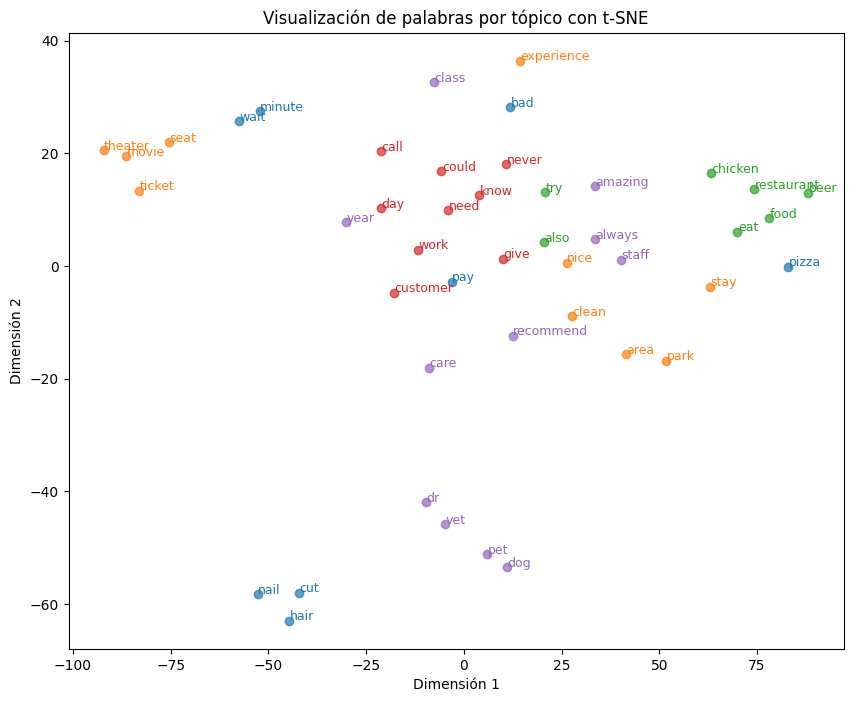

In [62]:
# Extraer palabras únicas de filtered_top_n_words_lda
words_to_plot = list(set(word for topic in filtered_top_n_words_lda for word in topic))

# Reducir dimensionalidad
vectors_2d, labels = reduce_dimensions(model, num_dimensions=2, words=words_to_plot)

# Graficar con colores por tópico
plot_words_by_topic(vectors_2d, labels, filtered_top_n_words_lda)